# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [28]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file  = "traffic-signs-data/test.p"
valid_file    = "traffic-signs-data/valid.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)
    
X_train_Org, y_train = train['features'], train['labels']
X_test_Org, y_test = test['features'], test['labels']
X_valid_Org, y_valid = valid['features'], valid['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [29]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

X_train_Org = np.concatenate((X_train_Org, X_valid_Org))
y_train = np.concatenate((y_train, y_valid))

# TODO: Number of training examples
n_train = len(X_train_Org)

# TODO: Number of testing examples.
n_test = len(X_test_Org)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_Org.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = (np.unique(y_train)).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

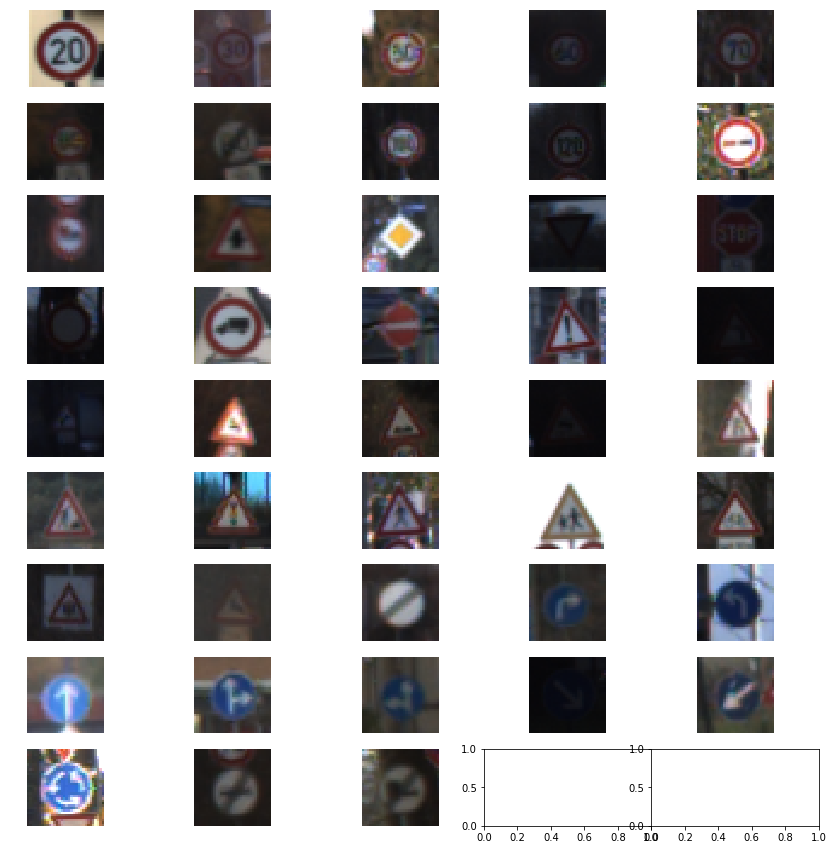

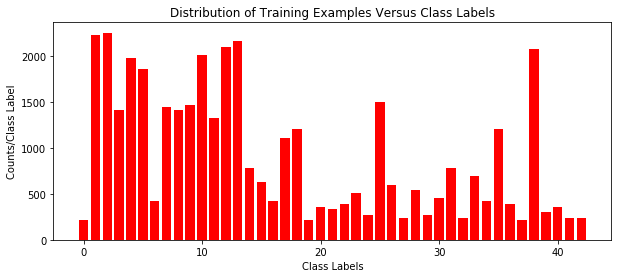

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_trainimages(train_samples, class_labels):
    labels, indices = np.unique(class_labels, return_index = True)
    shapes = train_samples.shape
    f, axs = plt.subplots(9,5,figsize=(15,15))
    for label_num, row in zip(labels, indices):
        plt.subplot(9, 5, label_num+1)
        plt.subplots_adjust(hspace = .2, wspace=.001)
        plt.axis('off')
        plt.imshow(train_samples[row, :,:,:])
  
    
def display_hist(class_labels):
    hist_counts = np.bincount(class_labels)
    bar = np.arange(np.max(class_labels)+1)
    plt.figure(figsize=(10, 4))
    plt.bar(bar, hist_counts, width = 0.8, color = 'r', align='center')
    plt.xlabel('Class Labels')
    plt.ylabel('Counts/Class Label')
    plt.title('Distribution of Training Examples Versus Class Labels')

display_trainimages(X_train_Org, y_train)                   
display_hist(y_train)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Question 1: Describe how you preprocessed the data. Why did you choose that technique?

Answer:
First, I convert training and test images from RGB to grayscale. The colors shouldn't matter to the traffic sign detection.The shape of the traffic signs here is the key. 
After that, training and test images are approximately normalized and the scaling issue has been taken care of. (pixel - 128)/128 is applied to complete the normalization.  
Third, I generate more training images. The reason why I did that is if you look at the histogram of the original training images, some labels show pretty low training samples. While some others show significant large amounts. I think this internal bias on the sample numbers among labels could cause the underfitting on some labels during the cnn. So more samples are generated to smooth the sample distribution along the labels. Four techniques I used to generate new training images are random rotate, random scale, random translate, and random affine transform. I need to emphasize the rotation angle in th random rotate should be small, because we have directional arrow signs. The significant amount rotation could cause ambiguity on those directional arrow signs detection. 
Last, training images and labels are shuffled. Validation set is split from the training set. 

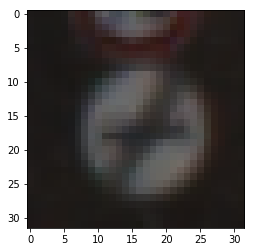

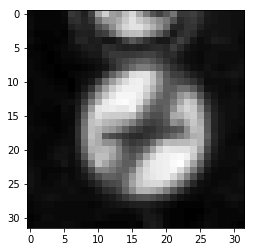

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import tensorflow as tf

#convert RGB to Gray
def rgb2gray(images):
    output = np.zeros((images.shape[0], images.shape[1], images.shape[2], 1))
    for row in np.arange(images.shape[0]):       
        output[row, :, :, 0] = cv2.cvtColor(images[row,:,:,:], cv2.COLOR_RGB2GRAY)
    return output

# normalize imags
def normalize(images):
    output = np.copy(images)
    output = (output-128)/128
    return output

plt.figure()
plt.imshow(X_train_Org[0].squeeze())

X_train = rgb2gray(X_train_Org)
X_test  = rgb2gray(X_test_Org)

X_train = normalize(X_train)
X_test  = normalize(X_test)

plt.figure()
plt.imshow(X_train[0].squeeze(), cmap='gray')


In [5]:
### Generate additional data sets to reduce internal bias caused by samples
### Random rotate images
from scipy import ndimage
import random

def randomRotate(img):  
    angles = [0, 0, -2, 2, -5, 5, -8, 8]
    rows, cols, colors = img.shape
    dst = np.zeros_like(img)
    dst = ndimage.rotate(img, random.choice(angles), reshape = False)
    return dst


In [6]:
### Random rescale images
def randomScale(img):      
    rows,cols, colors = img.shape    
    pixels = random.randint(-2,2)
    
    #source
    pts1 = np.float32([[pixels,pixels],[rows-pixels,pixels],[pixels,cols-pixels],[rows-pixels,cols-pixels]])    
    #destination
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:, :, np.newaxis]
    return dst

In [9]:
### Random Translate images
def randomTranslate(img):      
    rows,cols, colors = img.shape    
    pixels = random.randint(-2,2)
    
    M = np.float32([[1,0,pixels],[0,1,pixels]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = dst[:, :, np.newaxis]
    return dst

In [7]:
### Random Affine images
def randomAffine(img):      
    rows,cols, colors = img.shape 
    pixels = []
    pixels.append(random.randint(0, 2))
    pixels.append(random.randint(0, 2))
    
    pts1 = np.float32([[0,0],[0,32],[32,0]])
    pts2 = np.float32([[pixels[0],pixels[1]],[pixels[0],32-pixels[1]],[32-pixels[0],pixels[1]]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))   
    dst = dst[:, :, np.newaxis]
    return dst

In [16]:
## Create more test images
# min_desired below is just mean_pics but wanted to make the code below easier to distinguish
class_labels = np.bincount(y_train)
min_desired = 800

# Iterate through each class
for i in range(len(class_labels)):
    print(i)
    # Check if less data than the mean
    if class_labels[i] < min_desired:
        
        # Count how many additional pictures we want
        need_number = min_desired - class_labels[i]
        print('need_number:', need_number)
        samples = np.where(y_train == i)
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(need_number):
            img = (randomRotate(randomTranslate(randomAffine(randomScale(X_train[samples[0][random.randint(0, class_labels[i]-1)]])))))
            X_train = np.concatenate((X_train,[img]))
            y_train = np.concatenate((y_train, [i]))
print(X_train.shape)

0
need_number: 590
1
2
3
4
5
6
need_number: 380
7
8
9
10
11
12
13
14
need_number: 20
15
need_number: 170
16
need_number: 380
17
18
19
need_number: 590
20
need_number: 440
21
need_number: 470
22
need_number: 410
23
need_number: 290
24
need_number: 530
25
26
need_number: 200
27
need_number: 560
28
need_number: 260
29
need_number: 530
30
need_number: 350
31
need_number: 20
32
need_number: 560
33
need_number: 111
34
need_number: 380
35
36
need_number: 410
37
need_number: 590
38
39
need_number: 500
40
need_number: 440
41
need_number: 560
42
need_number: 560
(49510, 32, 32, 1)


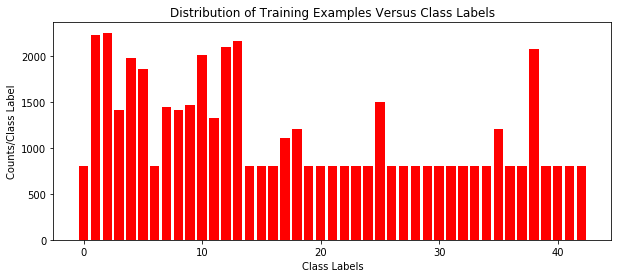

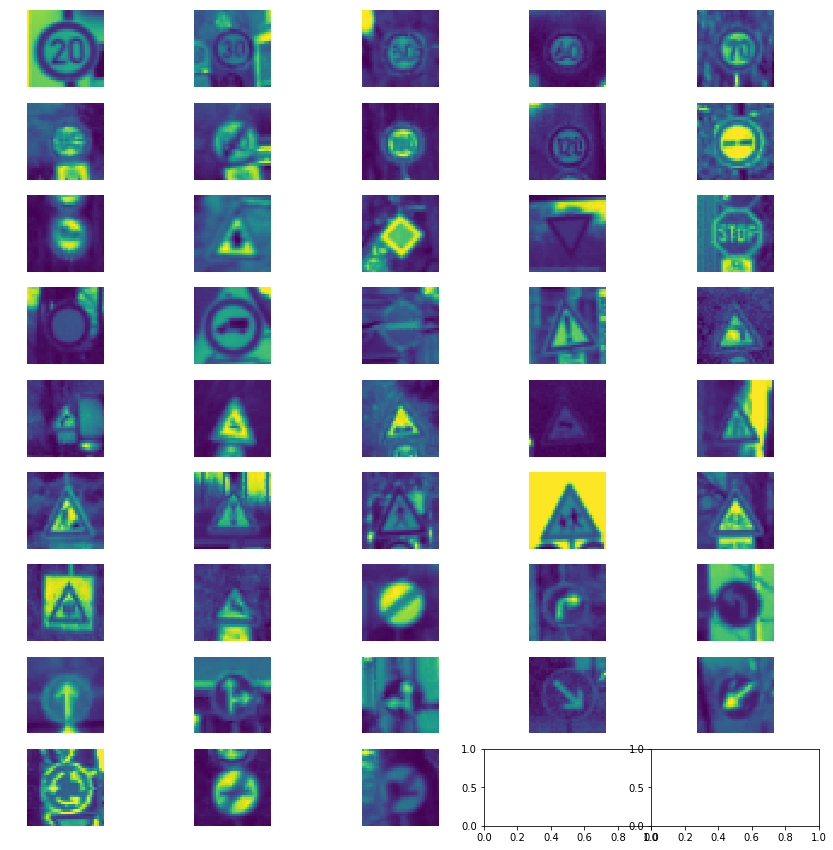

In [32]:
### histogram
display_hist(y_train)
def display_newmages(train_samples, class_labels):
    labels, indices = np.unique(class_labels, return_index = True)
    shapes = train_samples.shape
    f, axs = plt.subplots(9,5,figsize=(15,15))
    for label_num, row in zip(labels, indices):
        plt.subplot(9, 5, label_num+1)
        plt.subplots_adjust(hspace = .2, wspace=.001)
        plt.axis('off')
        plt.imshow(train_samples[row, :,:, 0])
plt.figure()
display_newmages(X_train, y_train)   

In [33]:
### shuffle
# Splitting the training dataset into training and validation data
from sklearn.utils import shuffle
# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)


Question 2: Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

Answer:
First I combined the samples from 'train.p' and 'valid.p' to one array: x_train_Org and y_train_Org. The histogram shows sample bias. So more images are needed to remove the bias and otherwise, it will cause underfitting. Then I applied preprocessing and creted more samples to compensate the sample bias issue based on above transformations. The new histogram shows relatively even distribution of samples versus classes. I got sufficient training samples. Next, I shuffled the images and after that, I used train_test_split to split 20% samples from the training set as the final validation data set. The testing data was directly loaded from 'test.p'. 

In [34]:
# Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)

print("New X_train size:",len(X_train))
print("New X_validation size:",len(X_valid))

New X_train size: 39608
New X_validation size: 9902


### Model Architecture

Question 3: Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) 

Answer
The kernal of my final model architecture is based on LeNet which is a 5-layer cnn. 
My final model consisted of the following layers:

Layer	            Description

Input	            32x32x1 grayscale image
Convolution         1x1	1x1 stride, valid padding, output 28x28x6
RELU	
Max pooling	        2x2 stride, outputs 14x14x6

Convolution         1x1	1x1 stride, valid padding, output 10x10x16
RELU
Max pooling         2x2 stride, outputs 5x5x16

Fully connected	    output 200
RELU
Drop out

Fully connected     output 100
RELU
Dropout

Fully connected     output43

Question 4: Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

Answer: 
The optimizer I used is AdamOptimizer. Batch size is 100, epoches is 10 times, learning rate is 0.003. The other parameters are list in the above table. When I tune the parameters, I find the learning rate plays the most significant impact on the final accuracy than the other parameters. I added drop outs to reduce the overfitting. 

In [46]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

EPOCHS = 10
BATCH_SIZE = 100

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, with layer 1 as input instead of x
    # And then of course changing the numbers to fit the desired ouput of 10x10x16
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    
    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [47]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [48]:
rate = 0.003

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [49]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Question 5: Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

Answer:
I started with LeNet architecture. The tuning process took me lots of time. At the very beginning, I tuned one parameter at one time while keeped the others unchange. By doing this, I feel the learning rate plays the highest impact on the results. Batch sizes and convolution weighting sizes come after that. At the beginning, I didn't add the drop out in the Lenet. I observed the test accuracy was less than 0.91 while the training accuracy was above 0.96. The large discrepancy implied the overfitting. Then I added drop out and the overfitting was resolved. The final tuning showed 0.937 test accuracy! Great! Pass 0.93!

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_new, y_train_new = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_new[offset:end], y_train_new[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign_cnn')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.789

EPOCH 2 ...
Validation Accuracy = 0.901

EPOCH 3 ...
Validation Accuracy = 0.930

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.961

EPOCH 6 ...
Validation Accuracy = 0.964

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.974

Model saved


In [51]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_cnn')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_cnn
Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

Question 6: Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Answer:
I found five images and plotted them as below. One difficulty I can think of is low resolution, especially for the second and the forth ones. The forth one may be difficult to be classified because the direction of forbidden sign is different from the sixth image in the above training set (image index starts st 0). 

### Load and Output the Images

(5, 32, 32, 3)


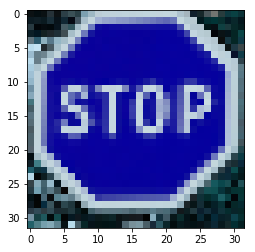

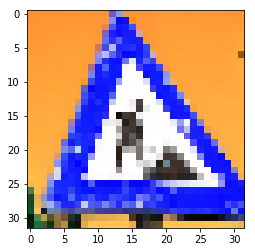

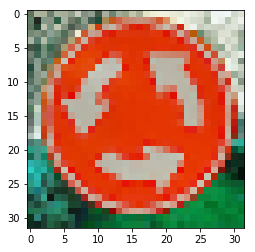

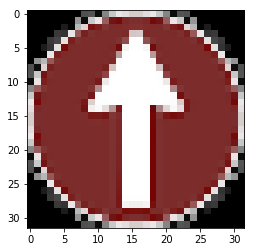

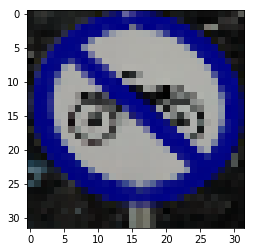

In [52]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os
os.listdir('traffic-signs-data/')
          
test_data = np.zeros((5, 32, 32, 3))
for i in range(1, 6):
    image_name = 'traffic-signs-data/image' + str(i) + '.png'
    sample = cv2.imread(image_name)
    new_sample = cv2.resize(sample, (32, 32))
    test_data[i-1,:,:,:] = new_sample
    plt.figure()
    plt.imshow(new_sample)

print(test_data.shape)

In [53]:
### Preprocessing new images
test_data_new = np.array(test_data, dtype=np.float32)
test_data_gray = rgb2gray(test_data_new)
test_data_norm = normalize(test_data_gray)

(5, 32, 32, 1)


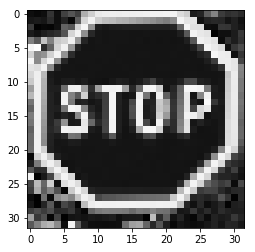

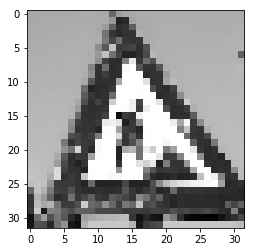

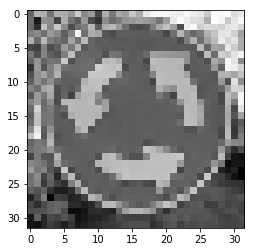

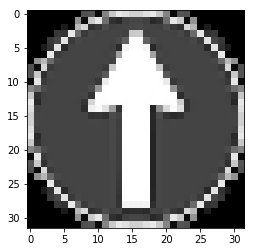

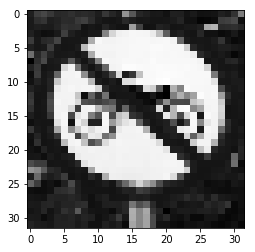

In [62]:
for i in range(0, 5):
    plt.figure()
    plt.imshow(test_data_norm[i].squeeze(), cmap='gray')

print(test_data_norm.shape)

### Predict the Sign Type for Each Image

In [64]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_cnn')
    new_pics_classes = sess.run(logits, feed_dict={x: test_data_norm, keep_prob : 1.0})


INFO:tensorflow:Restoring parameters from ./traffic_sign_cnn


### Analyze Performance

Question 7: Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Answer:
The model successfully predicts the labels for the first 4 images. The successful rate is 80% and comparing to above test accuracy, the new rate is relatively low. Again, I tested only 5 images here. If I apply more test samples, the accuracy may change. So the test accuracy based on these 5 images is less convincing to me than it based on the above validation set... In this particular test, the last one failed. As I explained in the above, the forbidden sign is different from the training set, which could cause the failure. 

In [68]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
y_newTest = [14, 25, 40, 35, 6]
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_cnn')    
    test_accuracy = evaluate(test_data_norm, y_newTest)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_cnn
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Question 8: Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

Answer: 
The probabilities for each predictin are printed out as below. According to the top 5 softmax probabilities, the model is very certain of classifying the image 0， 1, 2 and 3. The probabilities of the right class labels are abve 0.9! For the image 4, the right class label (6) is not included in top 5. The maximum probility is 0.58. The model completely fails on classifying this image. 

In [76]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_cnn')
    top5_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: test_data_norm, keep_prob : 1.0})
    
for i in range(len(top5_prob[0])):
    print('Image', i, 'probabilities:', top5_prob[0][i], '\n and predicted classes:', top5_prob[1][i])

INFO:tensorflow:Restoring parameters from ./traffic_sign_cnn
Image 0 probabilities: [  9.95402575e-01   4.59472323e-03   1.83813108e-06   8.32742217e-07
   4.09511074e-08] 
 and predicted classes: [14 33 13 35 34]
Image 1 probabilities: [  1.00000000e+00   1.82052495e-15   3.38809308e-17   2.99586000e-18
   1.15034095e-19] 
 and predicted classes: [25 21 30 31 38]
Image 2 probabilities: [  9.99951839e-01   4.27047817e-05   4.52153836e-06   9.06837215e-07
   3.88201720e-08] 
 and predicted classes: [40 12  7 11 37]
Image 3 probabilities: [  1.00000000e+00   6.60336985e-09   3.35587202e-09   2.18794760e-09
   3.90601246e-10] 
 and predicted classes: [35  9 33 10 13]
Image 4 probabilities: [ 0.58585358  0.36043334  0.01881942  0.01276796  0.01189375] 
 and predicted classes: [40 16 17 37 20]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.